#### References

- https://botlnec.github.io/islp/sols/chapter4/exercise8/

In [108]:
#### import libs
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as sm
import statsmodels.formula.api as smf

from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix

%matplotlib inline
plt.style.use("ggplot") # emulate pretty r-style plots

# print numpy arrays with precision 4
np.set_printoptions(precision = 4)

In [109]:
def plot_corr(df,size=10):
    '''Function plots a graphical correlation matrix for each pair of columns in the dataframe.

    Input:
        df: pandas DataFrame
        size: vertical and horizontal size of the plot'''

    # calculate the correlation matrix
    corr = df.corr()
    
    fig, ax = plt.subplots(figsize=(size, size))
    ax.matshow(corr)
    plt.xticks(range(len(corr.columns)), corr.columns);
    plt.yticks(range(len(corr.columns)), corr.columns);
    plt.show()
    
    cmap = sns.diverging_palette(240, 10, as_cmap=True)

    corr = corr.style.background_gradient(cmap, axis=1)\
        .set_properties(**{'max-width': '80px', 'font-size': '8pt'})

    return corr

<img src="../images/4.1-3.jpg">

### Question 1)

- Turn equation 4.2 to 4.3

#### 4.2
$$p(x) = \frac{e^{\beta_0 + \beta_1X}}{1 + e^{\beta_0 + \beta_1X}}$$

#### 4.3
$$\frac{p(x)}{1 - p(x)} = e^{\beta_0 + \beta_1X}$$

- First, multiply 4.2 by negative 1 and add 1 to both sides
$$1 - p(x) = 1 - \frac{e^{\beta_0 + \beta_1X}}{1 + e^{\beta_0 + \beta_1X}}$$
- Simplify right hand side
$$1 - p(x) = \frac{1}{1 + e^{\beta_0 + \beta_1X}}$$
- Now just divide 4.2 by the last equation and you have the result

### Question 2) 

Prove that 4.13 maximizes 4.12.

#### 4.12
<img src="../images/eq_4.12.jpg">

#### 4.13
<img src="../images/eq_4.13.jpg">


Since log is a monotone increasing function, maximizing the log of a function will also maximize the original function. After taking the log of 4.12 all constants can be dropped and you are left with the 4.13.

### Question 3)

#### Eq - 4.11
<img src="../images/eq_4.11.jpg">

- Prove that QDA is quadratic with one predictor

- This is shown by taking the log of 4.12 and throwing away all terms that don't depend on k. An extra term will be left attached to $x^2$ thus making it quadratic. This term disappears in LDA because all the variances are the same.

<img src="../images/4.4.jpg">

<img src="../images/4.4.1.jpg">

### Question 4)

#### a)
 - Since the set of observations X is uniformly (evenly) distributed on [0, 1] and considering that we are using a 10% range, the fraction of available information used is, on average, 10%.

#### b)
 - We have two sets of observations, X1 and X2, that are uniformly distributed on [0,1]x[0,1]. We wish to predict a test observation’s response using only observations that are within 10% of a X1 range and within 10% of a X2 range. This means that we want to evaluate an intersection, so we should apply the rule of multiplication.


    - We have 10%×10%=1%.

#### c)
 - This case is an extension of (b), so applying the rule of multiplication we have 

\begin{equation*}
10\% \times 10\% \times \cdots \times 10\%  = (10\%)^{100} = 10^{-98}\%
\end{equation*}



#### d)

- The drawback of KNN when p is large is that there are relatively very few training observations “near” any given test observation. As we have seen above, the fraction of points near a test observation can be extremely small, and most likely 0 is p is large enough. Essentially to be "near" a point implies being "near" in every dimension, and this gets less and less likely as the number dimensions increases. In other words, there are no neighbors in high dimensions. (In practice, the underlying distributions are not uniformly random and have a certain structure so points can still lump together somewhat.)



#### e)

- p=1.
    - In this case, the hypercube is a line segment centered around the training observation. This line has the length needed to contain 10% of the training observations. Since our observations are uniformly distributed on [0,1], the corresponding length of the hypercube side is 0.10.


- p=2.
    - Two features means that the hypercube is a square. We can imagine this square defined by two axis, both correspoding to a set of observations uniformly distributed on [0,1]x[0,1]. To have 10% of the training observations, each side x of the square must have:

    \begin{equation*}
        x^2 = 0.10 \times (1 \times 1) \Leftrightarrow x^2 = 0.10 \Leftrightarrow x = \sqrt{0.10}
    \end{equation*}

    - Thus, the correspoding length of the hypercube side is $\sqrt{0.10}$ ≈ 0.31 . So to get 10% of the observations we "need a square" whose side length is about 30% of the total width of the space.


- p=100.
    - In the last case the hypercube is a 100-dimensional cube. Applying the same logic as above, we have:

    \begin{equation*}
        x^{100} = 0.10 \times (1^{100}) \Leftrightarrow x = \sqrt[100]{0.10}
    \end{equation*}
    
    - Accordingly, the corresponding length of the hypercube side is $\sqrt[100]{0.10}$ ≈ 0.98 . Again we see that, in a way, there are no neighbors in high dimensions. It is a strange "local" method, one that uses 98% of the observations for each dimension.

<img src="../images/4.5.jpg">

### Question 5)

#### a)

- Regardless of the Bayes decision boundary, we expect QDA to perform better than LDA on the training set. This is because QDA is more flexible which leads to a closer fit. However if the Bayes decision boundary is linear, the additional flexibility of QDA leads to overfit, and LDA is expected to perform better than QDA on the test set.



#### b)

- As mentioned in the previous paragraph, due to the additional flexibility we expect QDA to perform better than LDA on the training set. If the Bayes decision boundary is non-linear we expect that QDA will also perform better on the test set, since the additional flexibility allows it to capture at least some of the non-linearity. In other words, LDA is biased leading to a worse performance on the test set (QDA could be biased as well depending on the nature of the non-linearity of the Bayes decision boundary, but it will be less so in general).



#### c)

- In both cases of linear and non-linear Bayes decision boundary we expect the performance of QDA to improve relative to LDA, as n increases. In the linear boundary case, QDA will have a worse performance on the test set since its excessive flexibility will cause it to overfit, but this overfitting will decrease as n increases as the variance is reduced, and QDA will improve relative to LDA. For a non-linear Bayes decision boundary, LDA is biased and will not improve significantly past a certain sample size. QDA on the other hand, will see its variance reduced while benefitting from a more flexible model that captures the underlying non-linearity better leading to a closer fit.


- In general, as n increases the more flexible model (QDA) sees its fit improve as the variance is reduced with the increasing sample size.



#### d)

- False. For a linear Bayes decision boundary, QDA is too flexible compared to LDA and the noise in the data will cause it to overfit. As the sample size increases the overfitting is reduced, but in general we still expect LDA to better since it is unbiased and less prone to fit the noise.

<img src="../images/4.6-9.jpg">

### Question 6)

#### a)

<img src="../images/4.6.a.jpeg">

In [2]:
### Coefficients
b0 = -6 
b1 = 0.05
b2 = 1

### Variable Values
x1 = 40
x2 = 3.5

### Eq 
t = b0 + b1 * x1 + b2 * x2

#### Prob of getting A
prob = 1/(1 + np.exp(-t))
print("Student has a {:.3f} probability of getting an A".format(prob))

Student has a 0.378 probability of getting an A


#### b) 
<img src="../images/4.6.b.jpg">

In [4]:
### Coefficients
b0 = -6 
b1 = 0.05
b2 = 1

### Variable Values
x1 = 40
x2 = 3.5

### Eq 
t = b0 + b1 * x1 + b2 * x2

# solve for t = 0. Since an odds of 1 corresponds to 50/50 chance and log(1) = 0
# 0 = -6 + b1 * x1 + b2 * x2
hours = (6 - b2 * x2) / b1
print("student needs to study {} hours to have a 50% chance at an A".format(hours))

student needs to study 50.0 hours to have a 50% chance at an A


### Question 7)

<img src="../images/4.7_ans.jpg">

In [10]:
#### Random Normal variable
def normal_dist(x, mean, sigma):
    #### 1/(sqrt(2 * pi * sigma_square)) * (exp(-(x-mean)_square/(2 * sigma_square)))
    return (1 /(np.sqrt(2 * np.pi * sigma ** 2))) * (np.exp(-(x - mean) ** 2 / (2 * sigma ** 2)))

In [12]:
prior = .8
mu_d = 10
mu_no_d = 0
sigma = 6
x = 4

f_d = normal_dist(x, mu_d, sigma)
f_no_d = normal_dist(x, mu_no_d, sigma)

# bayes Theorem
#### prob = prior * f_d/)(prior * f_d) + (1-prior) * f_no_d
prob_div = prior * f_d / (prior * f_d + (1 - prior) * f_no_d)
print("Probability of dividend is {:.3f}".format(prob_div))

Probability of dividend is 0.752


### Question 8)

- We should prefer the method that has a lower error rate on the test data because this shows how well the model works on unseen data. In other words, choosing the model with the lowest error rate on the test data means that we're choosing the model with better prediction capacity.


- In this case, the error rate on test data for the logistic regression is explicit: 30%. For the 1-nearest neighbor we have to do some computations.


- We know that when we use the 1-nearest neighbor, the average error rate is 18%. This error (ε) is averaged over both test and training sets, which means that:


\begin{equation*}
\frac{\varepsilon_{training} + \varepsilon_{test}}{2} = 0.18 \Leftrightarrow \varepsilon_{test} = 2 \times 0.18 - \varepsilon_{training}
\end{equation*}


- For a 1-nearest neighbor model, we have εtraining=0. This happens because for any training example, its nearest neighbor is always going to be itself. Therefore:


\begin{equation*}
\varepsilon_{test} = 2 \times 0.18 - \varepsilon_{training} \Leftrightarrow \varepsilon_{test} = 0.36 - 0 \Leftrightarrow \varepsilon_{test} = 0.36
\end{equation*}


- The method we should prefer to use for classification of new observations is the logistic regression method, even though its error rate on the training data is larger than the one for the 1-nearest neighbor model (18% vs. 0%).

### Question 9)

- The formulas for the odds in terms of the probability of a certain event, and vice-versa, are the following:

\begin{equation*}
odds = \frac{p}{1-p},
\end{equation*}


\begin{equation*}
p = \frac{odds}{1+odds}.
\end{equation*}


#### a)

- With odds=0.37, we get

\begin{equation*}
p = \frac{0.37}{1 + 0.37} \approx 0.27.
\end{equation*}


#### b)

- Similarly, if p = 0.16, we have

\begin{equation*}
odds = \frac{0.16}{1-0.16} \approx 0.19.
\end{equation*}


In [13]:
# p / (1 - p) = .37
# 1 / p - 1 = 1 / .37
odds = .37
one_over_p = 1 + 1 / odds
p = 1 / one_over_p
print("The probability of defaulting with odds of {} are {:.2f}".format(odds, p))
print("The odds of defaulting with probability .16 are {:.2f}".format(.16 / .84))

The probability of defaulting with odds of 0.37 are 0.27
The odds of defaulting with probability .16 are 0.19


<img src="../images/4.10.jpg">

### Question 10)

- [Load Dataset](#Load-Dataset)
- [A. Numerical and Graphical Summary of Data](#A.-Numerical-and-Graphical-Summary-of-Data)
- [B. Logistic Regression of Market Direction](#B.-Logistic-Regression-of-Market-Direction)
- [C. Examine Confusion Matrix](#C.-Examine-Confusion-Matrix)
- [D. Split Data and Re-Examine](#D.-Split-Data-and-Re-Examine)
- [E. Linear Discriminant Aanlysis of Market Direction](#E.-Linear-Discriminant-Analysis-of-Market-Direction)
- [F. Quadratic Discriminant Analysis of Market Direction](#F.-Quadratic-Discriminant-Analysis-of-Market-Direction)
- [G. K-Nearest Neighbors Analysis of Market Direction](#G.-K-Nearest-Neighbors-Analysis-of-Market-Direction)
- [H-I. Experiment with Predictors](#H-I.-Experiment-with-Predictors)

## Load Dataset

In [112]:
df = pd.read_csv("../data/Weekly.csv")
print('Weekly dataframe shape =', df.shape)
df.head(2)

Weekly dataframe shape = (1089, 9)


,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction
0,1990,0.816,1.572,-3.936,-0.229,-3.484,0.154976,-0.270,Down
1,1990,-0.270,0.816,1.572,-3.936,-0.229,0.148574,-2.576,Down


## A. Numerical and Graphical Summary of Data

We are interested in the relationship between each of the predictors (lags and volume) with the market direction. We can get an idea if any of these predictors are correlated with the response by looking at the correlation matrix.

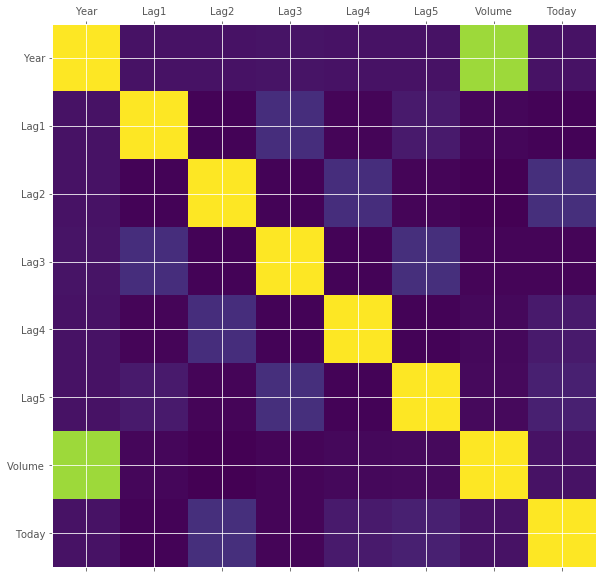

In [113]:
#### Correlation among variables
corr = plot_corr(df)

In [114]:
corr

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today
Year,1,-0.0322893,-0.03339,-0.0300065,-0.0311279,-0.0305191,0.841942,-0.0324599
Lag1,-0.0322893,1,-0.0748531,0.0586357,-0.0712739,-0.0081831,-0.0649513,-0.0750318
Lag2,-0.03339,-0.0748531,1,-0.0757209,0.0583815,-0.0724995,-0.0855131,0.0591667
Lag3,-0.0300065,0.0586357,-0.0757209,1,-0.0753959,0.0606572,-0.0692877,-0.0712436
Lag4,-0.0311279,-0.0712739,0.0583815,-0.0753959,1,-0.075675,-0.0610746,-0.00782587
Lag5,-0.0305191,-0.0081831,-0.0724995,0.0606572,-0.075675,1,-0.0585174,0.0110127
Volume,0.841942,-0.0649513,-0.0855131,-0.0692877,-0.0610746,-0.0585174,1,-0.0330778
Today,-0.0324599,-0.0750318,0.0591667,-0.0712436,-0.00782587,0.0110127,-0.0330778,1


As with the Smarket data, the strongest correlation is between year and volume. The Today's return value is weakly correlated with lag1, lag2 and lag3. Lets make a few plots.

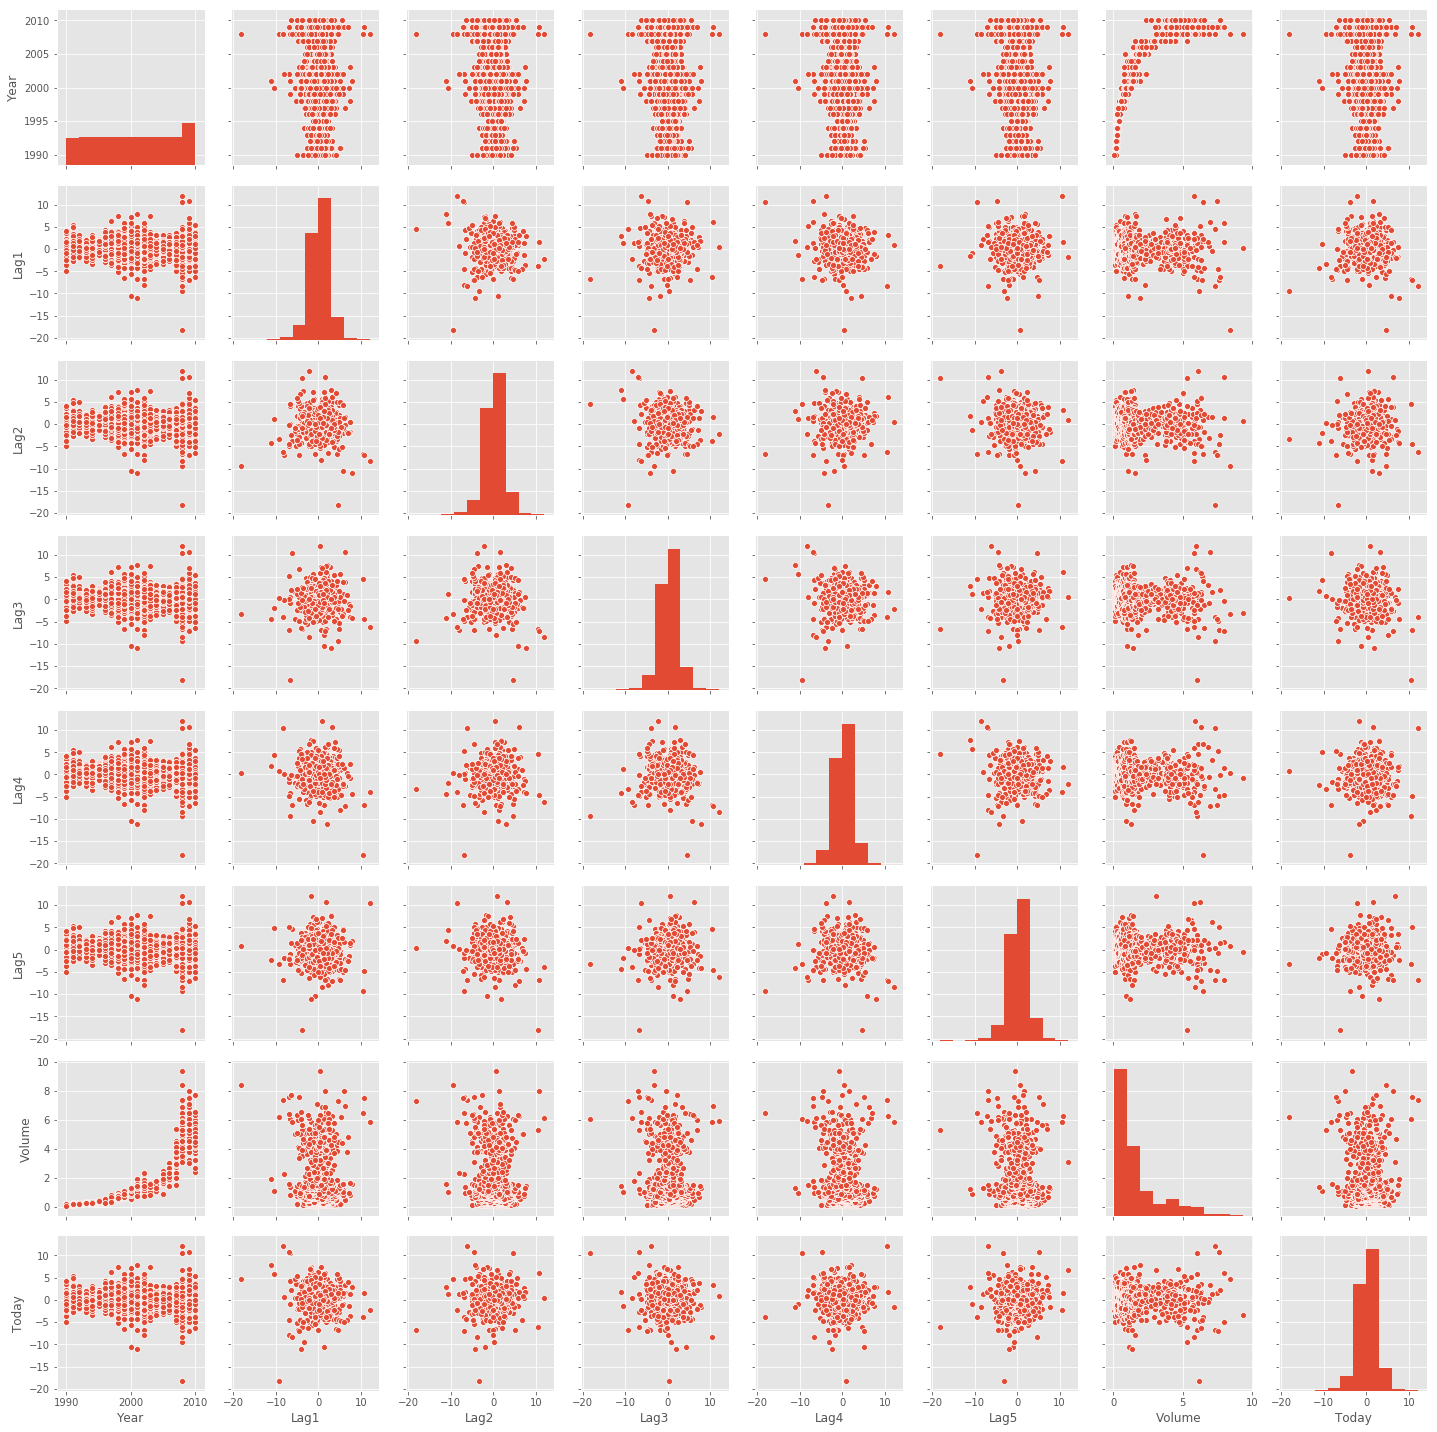

In [25]:
sns.pairplot(df, diag_kind="hist")

plt.show()

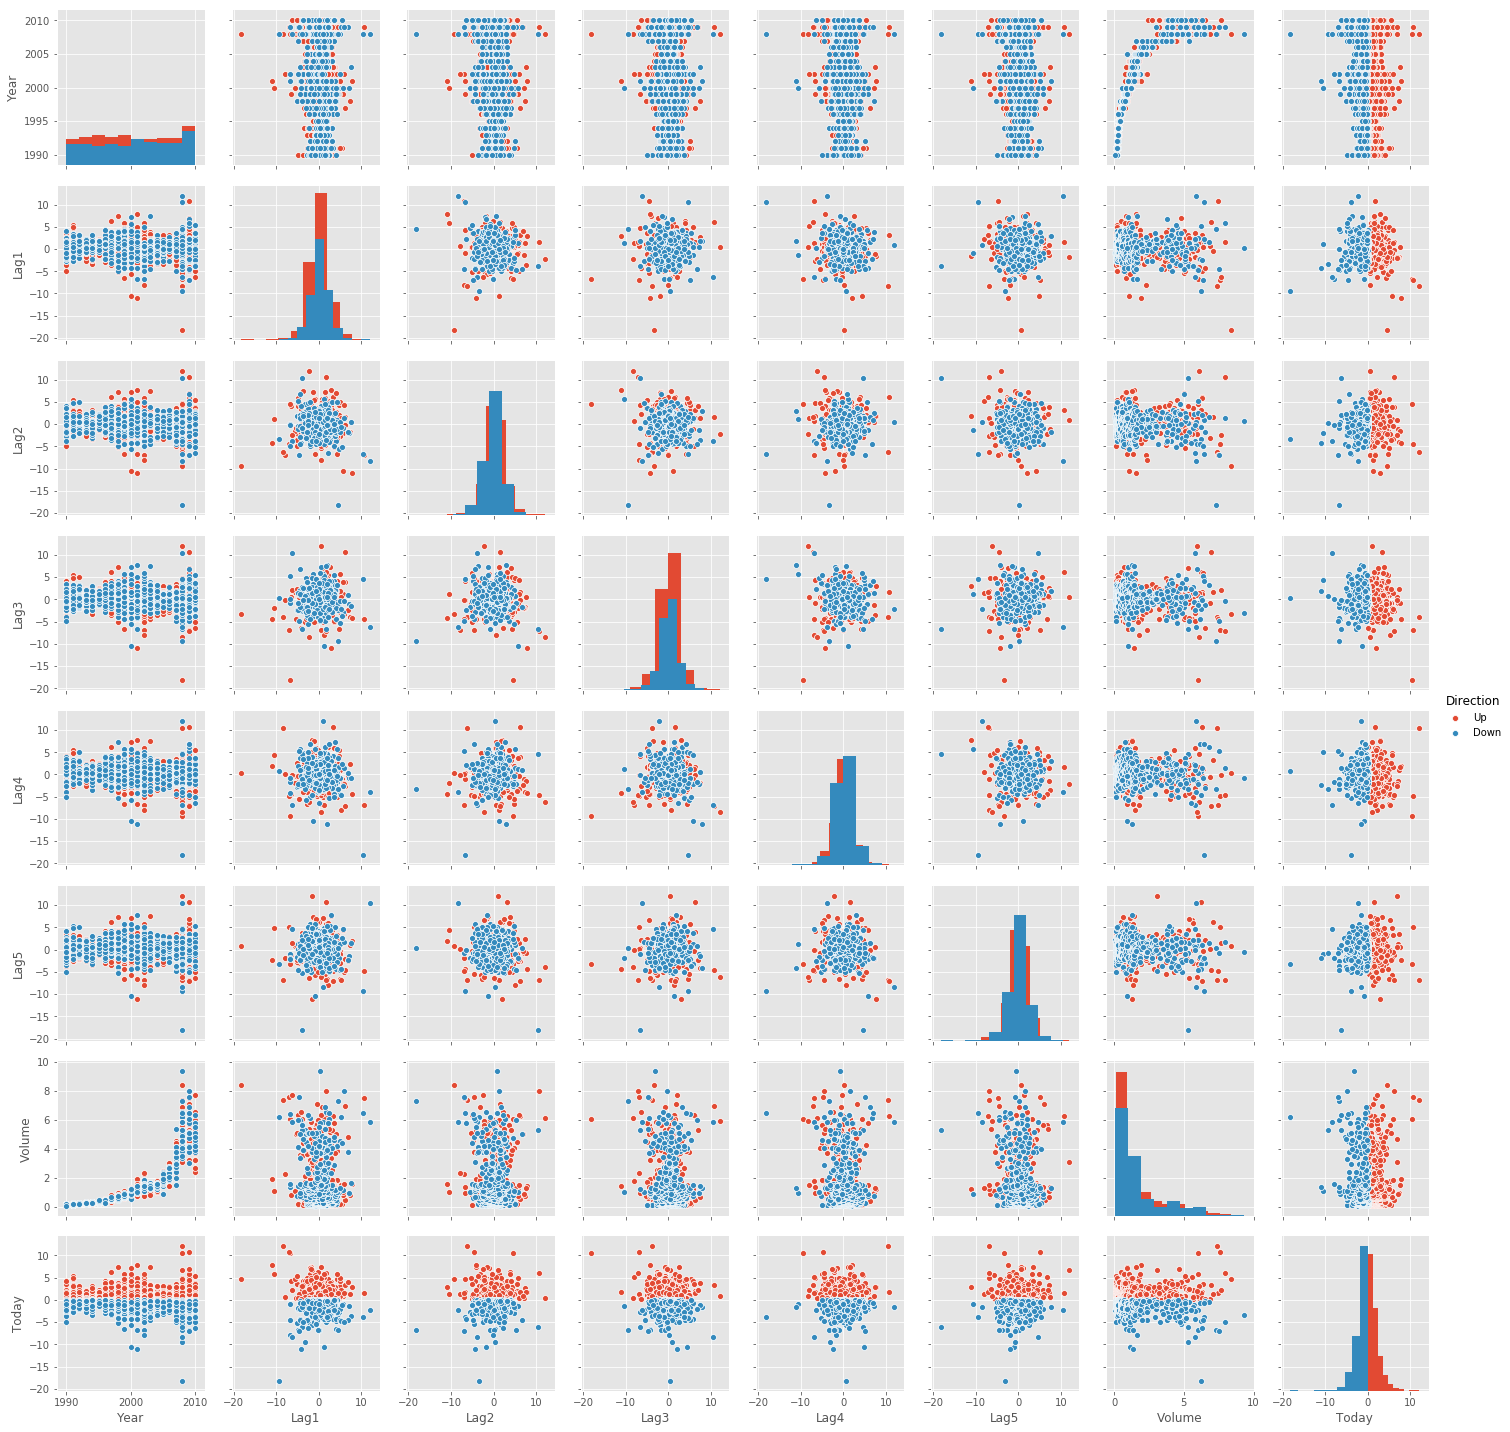

In [24]:
sns.pairplot(df, hue="Direction", hue_order=["Up", "Down"], diag_kind="hist")

plt.show()

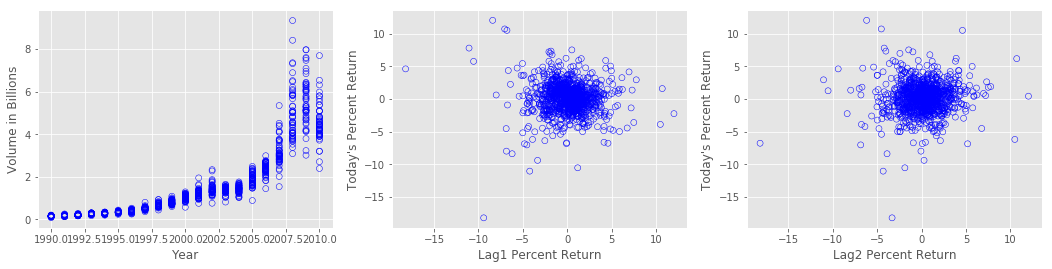

In [35]:
# Plot the Trading Volume vs. Year
fig, (ax1,ax2,ax3) = plt.subplots(1,3,figsize=(18,4));

ax1.scatter(df.Year.values, df.Volume.values, facecolors='none', edgecolors='b');
ax1.set_xlabel('Year');
ax1.set_ylabel('Volume in Billions');

# Plot Lag1 vs Today's return
ax2.scatter(df.Lag1.values, df.Today.values, facecolors='none', edgecolors='b' );
ax2.set_xlabel('Lag1 Percent Return');
ax2.set_ylabel('Today\'s Percent Return');

# Plot Lag1 vs Today's return
ax3.scatter(df.Lag2.values, df.Today.values, facecolors='none', edgecolors='b' );
ax3.set_xlabel('Lag2 Percent Return');
ax3.set_ylabel('Today\'s Percent Return');


As expected given the correlation matrix, there is a strong relationship between year and trading volume (stock market volume increases over time) and a very weak relationship (not visible graphically) between Today's percentage return and the previous days returns (i.e. the lags). We should not expect our models to perform exceedingly well because the is little relationship between the predictors and response.

## B. Logistic Regression of Market Direction

We will now build a logistic regression model for the market direction using the entire dataset using all the lags and volume to attempt to predict the direction response variable.

In [39]:
#### Create new variable direction2 - with 0-up, 1-Down
df["Direction2"] = np.array([1 if el == "Up" else 0 for el in df["Direction"].values])

#### Model - logistic
formula = "Direction2 ~ Lag1 + Lag2 + Lag3 + Lag4 + Lag5 + Volume"
model = smf.logit(formula, df)

#### Fit model
results = model.fit()

#### Summary
results.summary()

Optimization terminated successfully.
         Current function value: 0.682441
         Iterations 4


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:             Direction2   No. Observations:                 1089
Model:                          Logit   Df Residuals:                     1082
Method:                           MLE   Df Model:                            6
Date:                Sun, 09 Dec 2018   Pseudo R-squ.:                0.006580
Time:                        12:44:11   Log-Likelihood:                -743.18
converged:                       True   LL-Null:                       -748.10
                                        LLR p-value:                    0.1313
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.2669      0.086      3.106      0.002       0.098       0.435
Lag1          -0.0413      0.026     -1.563      0.118      -0.093       0.010
Lag2           0.0584      0.027      2.175      0.030       0.006       0.111
Lag3          -0.0161      0.027     -0.602      0.547      -0.068       0.036
Lag4          -0.0278      0.026     -1.050      0.294      -0.080       0.024
Lag5          -0.0145      0.026     -0.549      0.583      -0.066       0.037
Volume        -0.0227      0.037     -0.616      0.538      -0.095       0.050
==============================================================================
"""

Only the Lag2 variable of the predictors is significant at an alpha confidence level of 0.05. The predictors that have the lowest p-values are Lag1 and Lag2. A model based on these two variables would be reasonable to attempt.

## C. Examine Confusion Matrix

In [49]:
table = results.pred_table(threshold=0.5)
print('\n')
print('Error Rate =', 1-(table.diagonal().sum())/np.sum(table))

print("Confusion Matrix : ")
pd.DataFrame(table, ['Down', 'Up'], ['Down', 'Up'])



Error Rate = 0.43893480257116624
Confusion Matrix : 


,Down,Up
Down,54.0,430.0
Up,48.0,557.0


#### Summary: 
 
 - PRECISION: On days when the model predicts the market to increase, the probability the market does increase is 557/(430+557) of 56%. 


- TYPE I ERROR: (AKA false-positive), the probability that we have predicted the market to increase and it does not increase is 430/(430+54) = 89%


- TYPE II ERROR: This is the number of false negatives to all positives. It is 48/(557+48)= 8%


- The sensitivity is therefore 92%. The model is very sensitive to catching all true positives, but this incurs a high false positive rate. This is the inverse relationship between Type I and Type II errors.

## D. Split Data and Re-Examine

We are now going to split the data into a training set and a testing set and refit a logistic model using Lag2 as the only predictor. The training data will be the data from the years 1990 through 2008 and the testing data will be from 2009 through 2010.

In [54]:
# Split Data #
##############
# get the values for years less than =  2008
df_X_train = df.loc[df["Year"] <= 2008]
df_X_test = df.loc[df["Year"] > 2008]

# Construct Classifier and Fit #
formula = "Direction2 ~ Lag2"
model = smf.logit(formula, df_X_train)

#### Fit model
results = model.fit()

results.summary()

Optimization terminated successfully.
         Current function value: 0.685555
         Iterations 4


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:             Direction2   No. Observations:                  985
Model:                          Logit   Df Residuals:                      983
Method:                           MLE   Df Model:                            1
Date:                Sun, 09 Dec 2018   Pseudo R-squ.:                0.003076
Time:                        12:53:04   Log-Likelihood:                -675.27
converged:                       True   LL-Null:                       -677.35
                                        LLR p-value:                   0.04123
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.2033      0.064      3.162      0.002       0.077       0.329
Lag2           0.0581      0.029      2.024      0.043       0.002       0.114
==============================================================================
"""

In [66]:
# Predict Test Set Responses #
##############################
y_predicted = results.predict(df_X_test)

#conver the predicted probabilities to a class
y_predicted= np.array(y_predicted > 0.5, dtype=float)

# Build Confusion Matrix #
##########################
table = confusion_matrix(y_predicted, df_X_test["Direction2"].values)
conf_mat = pd.DataFrame(table, ['Down', 'Up'], ['Down', 'Up'])

print('Error Rate =', 1-(table[0,0]+table[1,1])/np.sum(table))
print('\n')

print('CONFUSION MATRIX')
conf_mat

Error Rate = 0.375


CONFUSION MATRIX


,Down,Up
Down,9,5
Up,34,56


## E. Linear Discriminant Analysis of Market Direction

We will now try to predict market direction by using the Linear Discriminant function. The LDA module in sklearn will estimate the priors, the vector of class means, and the variance (remember the variance is assumed to be the same for all classes in LDA). Our classes are 'Up' and 'Down', the priors are P('Up') and P('Down') and the means are $\mu_{Up}$ and $\mu_{Down}$.

In [79]:
# Create LDA Classifier and Fit #
#################################
lda_model = LDA(solver="lsqr", store_covariance= True)

X_train = df_X_train["Lag2"].values.reshape(-1,1)
y_train = df_X_train["Direction2"].values

lda_model.fit(X_train, y_train)
print('Priors = ', lda_model.priors_ )
print('Class Means = ', lda_model.means_[0], lda_model.means_[1])
print('Coeffecients = ', lda_model.coef_)

Priors =  [0.4477 0.5523]
Class Means =  [-0.0357] [0.2604]
Coeffecients =  [[0.0578]]


In [78]:
# Predict Test Set Responses #
##############################
X_test = df_X_test["Lag2"].values.reshape(-1,1)
y_test = df_X_test["Direction2"].values

y_predicted = lda_model.predict_proba(X_test)[:, 1]

#conver the predicted probabilities to class 0 or 1
y_predicted= np.array(y_predicted > 0.5, dtype=float)

# Build Confusion Matrix #
##########################
table = confusion_matrix(y_predicted, y_test)
conf_mat = pd.DataFrame(table, ['Down', 'Up'], ['Down', 'Up'])

print('Error Rate =', 1-(table[0,0]+table[1,1])/np.sum(table))
print('\n')

print('CONFUSION MATRIX')
conf_mat

Error Rate = 0.375


CONFUSION MATRIX


,Down,Up
Down,9,5
Up,34,56


The results of the LDA model are exactly the same as the regression model.

## F. Quadratic Discriminant Analysis of Market Direction 

Now we will use quadratic discriminant analysis on the weekly returns data set. QDA does not assume that all the classes have the same variance and hence their is a quadratic term in the maximization of the density function P(X=x|y=k). Again, sklearn will estimate the class priors, means, and variances and compute the class that maximizes the conditional probability P(y=k|X=x).

In [81]:
# Create LDA Classifier and Fit #
#################################
qda_model = QDA(store_covariance= True)

X_train = df_X_train["Lag2"].values.reshape(-1,1)
y_train = df_X_train["Direction2"].values

qda_model.fit(X_train, y_train)
print('Priors = ', qda_model.priors_ )
print('Class Means = ', qda_model.means_[0], qda_model.means_[1])
print('Coeffecients = ', qda_model.covariances_)

Priors =  [0.4477 0.5523]
Class Means =  [-0.0357] [0.2604]
Coeffecients =  [array([[4.8378]]), array([[5.3707]])]


In [82]:
# Predict Test Set Responses #
##############################
X_test = df_X_test["Lag2"].values.reshape(-1,1)
y_test = df_X_test["Direction2"].values

y_predicted = qda_model.predict_proba(X_test)[:, 1]

#conver the predicted probabilities to class 0 or 1
y_predicted= np.array(y_predicted > 0.5, dtype=float)

# Build Confusion Matrix #
##########################
table = confusion_matrix(y_predicted, y_test)
conf_mat = pd.DataFrame(table, ['Down', 'Up'], ['Down', 'Up'])

print('Error Rate =', 1-(table[0,0]+table[1,1])/np.sum(table))
print('\n')

print('CONFUSION MATRIX')
conf_mat

Error Rate = 0.41346153846153844


CONFUSION MATRIX


,Down,Up
Down,0,0
Up,43,61


For a quadratic decision boundary we need to have multiple predictors with different correlation for each class. Here we have a single predictor so the boundary cannot be quadratic. Thus the model perfoms poorly.

## G. K-Nearest Neighbors Analysis of Market Direction

In [87]:
# Build KNN Classifier and Fit #
################################
X_train = df_X_train["Lag2"].values.reshape(-1,1)
y_train = df_X_train["Direction2"].values

knn_1 = KNeighborsClassifier(n_neighbors= 1)
knn_1.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

In [88]:
# Predict Test Set Responses #
##############################
X_test = df_X_test["Lag2"].values.reshape(-1,1)
y_test = df_X_test["Direction2"].values

y_predicted = knn_1.predict(X_test)

# Build Confusion Matrix #
##########################
table = confusion_matrix(y_predicted, y_test)
conf_mat = pd.DataFrame(table, ['Down', 'Up'], ['Down', 'Up'])

print('Error Rate =', 1-(table[0,0]+table[1,1])/np.sum(table))
print('\n')

print('CONFUSION MATRIX')
conf_mat

Error Rate = 0.5096153846153846


CONFUSION MATRIX


,Down,Up
Down,21,31
Up,22,30


Using only 1 Nearest Neighbor, the model performs at chance level.

In [90]:
# Build KNN Classifier and Fit #
################################
X_train = df_X_train["Lag2"].values.reshape(-1,1)
y_train = df_X_train["Direction2"].values

knn_20 = KNeighborsClassifier(n_neighbors= 20)
knn_20.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=20, p=2,
           weights='uniform')

In [91]:
# Predict Test Set Responses #
##############################
X_test = df_X_test["Lag2"].values.reshape(-1,1)
y_test = df_X_test["Direction2"].values

y_predicted = knn_20.predict(X_test)

# Build Confusion Matrix #
##########################
table = confusion_matrix(y_predicted, y_test)
conf_mat = pd.DataFrame(table, ['Down', 'Up'], ['Down', 'Up'])

print('Error Rate =', 1-(table[0,0]+table[1,1])/np.sum(table))
print('\n')

print('CONFUSION MATRIX')
conf_mat

Error Rate = 0.40384615384615385


CONFUSION MATRIX


,Down,Up
Down,23,22
Up,20,39


## H-I. Experiment with Predictors

By varying the k-value, we can empiraically find the minimum test error rate. This occurs at ~ 20 nearest neighbors (see results above). The error rate (40 %) is still higher than in the logistic or LDA models. They perform best on this data set. 

**Model with Lag1, Lag2 and Lag3**

It is unlikely that we can make much improvement on the model by adding more uncorrelated variables to the model. Below, I first tried adding Lag3, the predictor with the next lowest p-value. The error rate increases on the test data.

** Model with Lag1 x Lag2 Interaction **

The Lag2 variable in the full logistic model was the only variable with a significant coeffecient. The next most significant term was Lag1. We will build a model with both of these predictors and include an interaction term. We have very little motivation for this because the plots of Lag1 and Lag2 vs today's return do not indicate any strong relationships. 

### Model with Three Lags

In [92]:
# Split Data #
##############
predictors = df.columns[1:4]
X_train = sm.add_constant(df[df.Year <= 2008][predictors])
response_train = df[df.Year <= 2008].Direction
# convert responses to 0,1's
y_train = np.array([1 if el=='Up' else 0 for el in response_train])

# for the test set use the years > 2008
X_test = sm.add_constant(df[df.Year > 2008][predictors])
response_test = df[df.Year > 2008].Direction
y_test = np.array([1 if el=='Up' else 0 for el in response_test])

# Construct Classifier and Fit #
################################
logit = sm.Logit(y_train, X_train)
results = logit.fit()
print(results.summary())
print('\n')

# Predict Test Set Responses #
##############################
y_predicted = results.predict(X_test)

#conver the predicted probabilities to a class
y_predicted= np.array(y_predicted > 0.5, dtype=float)

# Build Confusion Matrix #
##########################
table = confusion_matrix(y_predicted, y_test)
print('CONFUSION MATRIX')
print(pd.DataFrame(table, ['Down', 'Up'], ['Down', 'Up']))
print('\n')
print('Error Rate =', 1-(table[0,0]+table[1,1])/np.sum(table))

Optimization terminated successfully.
         Current function value: 0.683687
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                  985
Model:                          Logit   Df Residuals:                      981
Method:                           MLE   Df Model:                            3
Date:                Sun, 09 Dec 2018   Pseudo R-squ.:                0.005792
Time:                        15:50:19   Log-Likelihood:                -673.43
converged:                       True   LL-Null:                       -677.35
                                        LLR p-value:                   0.04928
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2123      0.065      3.282      0.001       0.086       0.339
Lag1          -0.0537      0.

### Model with Two Lags and Interaction

In [93]:
# Add Interaction #
###################
# add the interaction term to the dataframe
df['Lag1xLag2'] = pd.Series(df.Lag1*df.Lag2, index=df.index)
predictors = ['Lag1', 'Lag2', 'Lag1xLag2']

# Split Data #
##############
X_train = sm.add_constant(df[df.Year <= 2008][predictors])
response_train = df[df.Year <= 2008].Direction
# convert responses to 0,1's
y_train = np.array([1 if el=='Up' else 0 for el in response_train])

# for the test set use the years > 2008
X_test = sm.add_constant(df[df.Year > 2008][predictors])
response_test = df[df.Year > 2008].Direction
y_test = np.array([1 if el=='Up' else 0 for el in response_test])

# Construct Classifier and Fit #
################################
logit = sm.Logit(y_train, X_train)
results = logit.fit()
print(results.summary())
print('\n')

# Predict Test Set Responses #
##############################
y_predicted = results.predict(X_test)
#conver the predicted probabilities to a class
y_predicted= np.array(y_predicted > 0.5, dtype=float)

# Build Confusion Matrix #
##########################
table = confusion_matrix(y_predicted, y_test)
print('CONFUSION MATRIX')
print(pd.DataFrame(table, ['Down', 'Up'], ['Down', 'Up']))
print('\n')
print('Error Rate =', 1-(table[0,0]+table[1,1])/np.sum(table))

Optimization terminated successfully.
         Current function value: 0.683701
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                  985
Model:                          Logit   Df Residuals:                      981
Method:                           MLE   Df Model:                            3
Date:                Sun, 09 Dec 2018   Pseudo R-squ.:                0.005772
Time:                        15:51:03   Log-Likelihood:                -673.45
converged:                       True   LL-Null:                       -677.35
                                        LLR p-value:                   0.04990
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2114      0.065      3.273      0.001       0.085       0.338
Lag1          -0.0515      0.

Again we are finding no improvement, the best model is the logistic or LDA model. In these models we used only the significant Lag2 variable and achieved and error rate ~33%. 

<img src="../images/4.11.jpg">

### Question 11)

- [Load Auto Dataset](#Load-Auto-Dataset)
- [A. Create a Binary MPG Response Variable](#A.-Create-a-Binary-MPG-Response-Variable)
- [B. Explore Data Graphically](#B.-Explore-Data-Graphically) 
- [C. Split the Data](#C.-Split-the-Data)
- [D. Perform LDA and Evaluate Model](#D.-Perform-LDA-and-Evaluate-Model)
- [E. Perform QDA and Evaluate Model](#D.-Perform-QDA-and-Evaluate-Model)
- [F. Perform Logistic Regression and Evaluate Model](#F.-Perform-Logistic-Regression-and-Evaluate-Model)
- [G. Perform KNN Analysis and Evaluate Model](#G.-Perform-KNN-Analysis-and-Evaluate-Model)

## Load Auto Dataset

In [115]:
df = pd.read_csv('../data/Auto.csv',na_values='?')
df = df.dropna()
df.head(2)

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320


## A. Create a Binary MPG Response Variable

We will create a binary MPG response called MPG01 as follows, we will calculate the median of the MPG variable. For instances of MPG < median(MPG) MPG01=0 and for values of MPG > median(MPG) MPG01=1.

In [121]:
print('The median mpg is', df.mpg.median())
print('There are', len(df), 'instances')
med = df.mpg.median()

df['MPG01'] = np.array([1 if val > med else 0 for val in df["mpg"].values]) 
df.head(2)

The median mpg is 22.75
There are 392 instances


,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name,MPG01
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu,0
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320,0


## B. Explore Data Graphically

We will explore the relationship of the predictors to MPG01. We will do this in two stages. First, we will look at scatterplots of all the predictors since the number of predictors is relatively low. Then we can zoom in on the relationship between specific predictors and the response using boxplots which are useful to plot responses over different categories.

#### Correlation among features

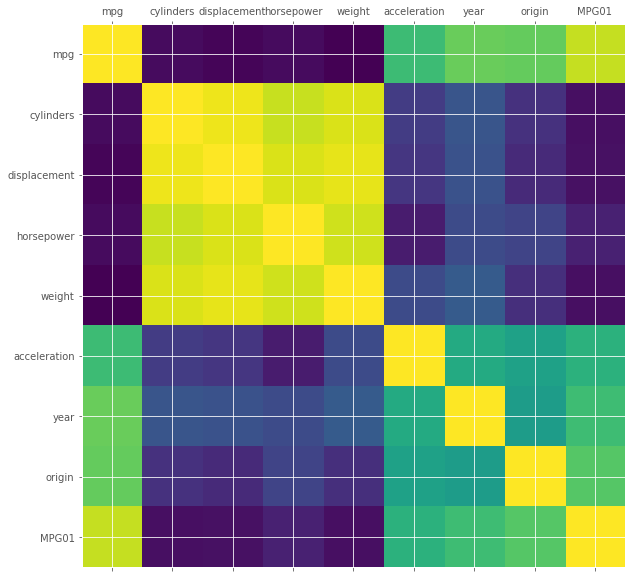

In [122]:
corr = plot_corr(df,size=10)

In [123]:
corr

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,MPG01
mpg,1,-0.777618,-0.805127,-0.778427,-0.832244,0.423329,0.580541,0.565209,0.836939
cylinders,-0.777618,1,0.950823,0.842983,0.897527,-0.504683,-0.345647,-0.568932,-0.759194
displacement,-0.805127,0.950823,1,0.897257,0.932994,-0.5438,-0.369855,-0.614535,-0.753477
horsepower,-0.778427,0.842983,0.897257,1,0.864538,-0.689196,-0.416361,-0.455171,-0.667053
weight,-0.832244,0.897527,0.932994,0.864538,1,-0.416839,-0.30912,-0.585005,-0.757757
acceleration,0.423329,-0.504683,-0.5438,-0.689196,-0.416839,1,0.290316,0.212746,0.346822
year,0.580541,-0.345647,-0.369855,-0.416361,-0.30912,0.290316,1,0.181528,0.429904
origin,0.565209,-0.568932,-0.614535,-0.455171,-0.585005,0.212746,0.181528,1,0.513698
MPG01,0.836939,-0.759194,-0.753477,-0.667053,-0.757757,0.346822,0.429904,0.513698,1


### Scatterplots

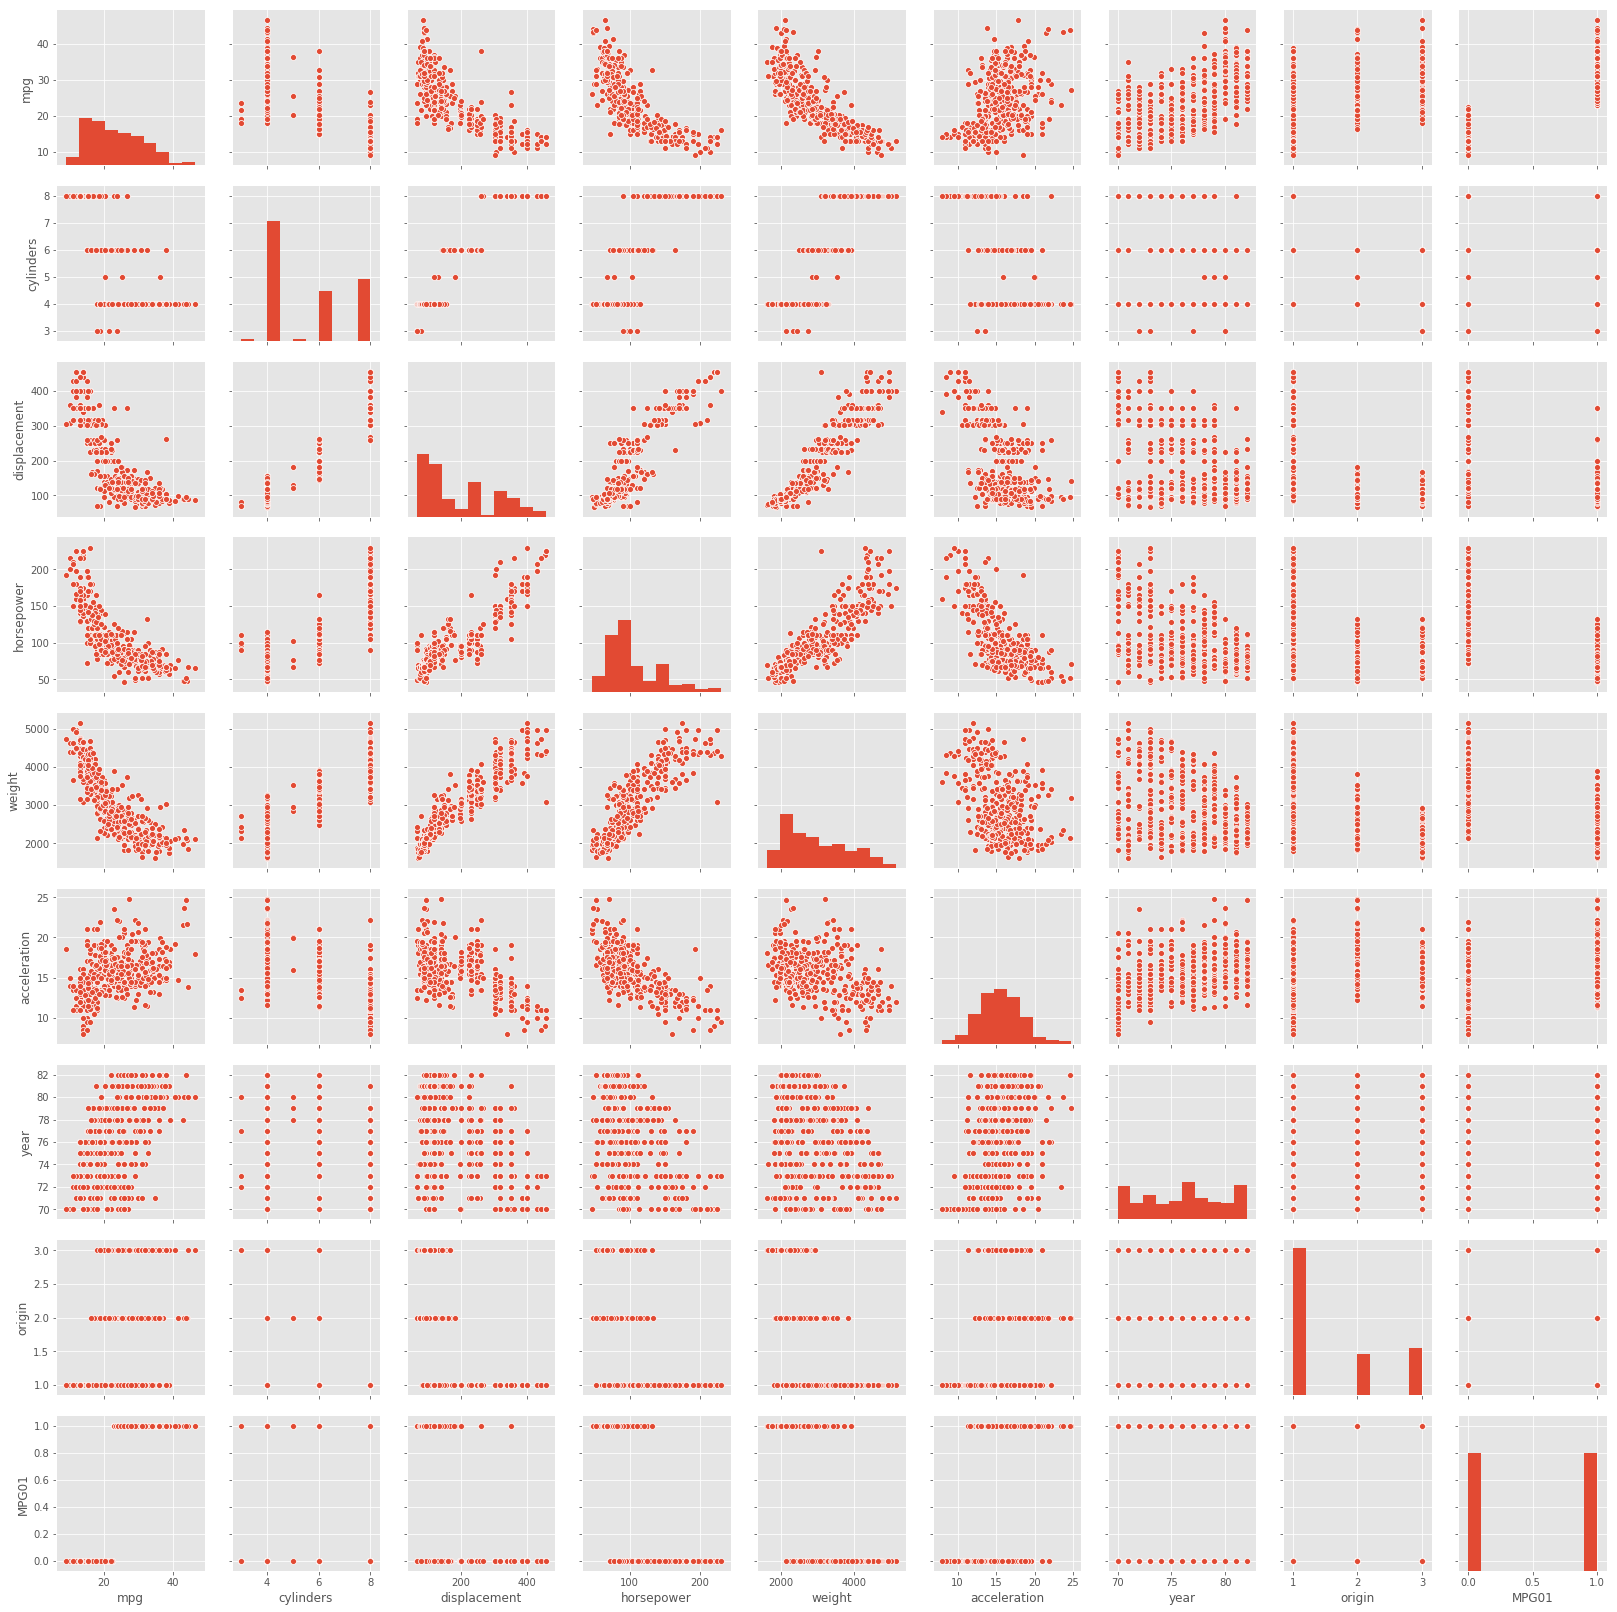

In [124]:
sns.pairplot(df, diag_kind="hist")

plt.show()

### Boxplots

From the above scatterplots, the variables horsepower, weight and acceleration seem to be useful in predicting MPG01. Lets take a look at these in box-plots. 

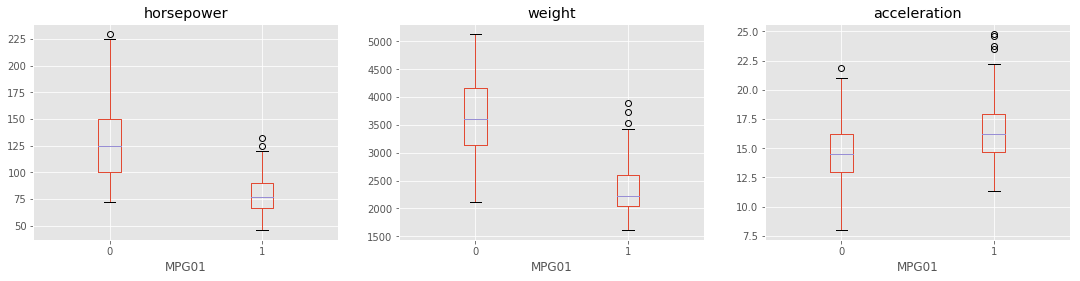

In [129]:
# Construct box plots grouped by MPG01
fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(18,4))
df.boxplot(['horsepower'], by='MPG01', ax=ax1);
df.boxplot(['weight'],by='MPG01',ax=ax2);
df.boxplot(['acceleration'], by='MPG01', ax=ax3);
fig.suptitle(''); # remove pandas auto title

The medians of the horsepower, weight and acceleration are different between the classes of cars with mpg > or < Median(mpg), although we would need to perform a hypothesis test to see if they are significantly different. These variables are the ones that we will use to classify auto data with.

## C. Split the Data

We will now split the data into a test set and a training set. Pandas provides a samplimng method for a dataframe.

In [134]:
# select 300 random samples from dataframe for training
num_samples = 300
# np.random.seed(300)
rows = np.random.choice([True, False], num_samples)
df_train = df.loc[rows]
df_test = df.loc[~rows]

## D. Perform LDA and Evaluate Model

In [135]:
# Get Training/Test Predictors and Responses #
##############################################
predictors = ['horsepower', 'weight', 'acceleration']
X_train =  df_train[predictors].values
y_train = df_train['MPG01'].values

X_test = df_test[predictors].values
y_test = df_test['MPG01'].values

# Build LDA Classifier and Fit #
################################
lda_clf = LDA(solver='lsqr',store_covariance=True)
lda_clf.fit(X_train,y_train)

print('Class Priors =', lda_clf.priors_)
print('Class Means =', lda_clf.means_[0], lda_clf.means_[1])
print('Coeffecients =', lda_clf.coef_)

# Predict Test Data and Evaluate #
##################################
y_predicted = lda_clf.predict(X_test)
print('\n **The error rate of the LDA model is {0:.2f}%** '.format(100*np.mean(y_predicted!=y_test)))


Class Priors = [0.6074 0.3926]
Class Means = [ 135.5488 3758.2195   14.2402] [  78.8491 2284.9623   16.6906]
Coeffecients = [[ 0.0224 -0.0046  0.2531]]

 **The error rate of the LDA model is 13.94%** 


## E. Perform QDA and Evaluate Model

In [136]:
# Build LDA Classifier and Fit #
################################
qda_clf = QDA()
qda_clf.fit(X_train,y_train)

print('Class Priors =', lda_clf.priors_)
print('Class Means =', lda_clf.means_[0], lda_clf.means_[1])

# Predict Test Data and Evaluate #
##################################
y_predicted = qda_clf.predict(X_test)
print('\n **The error rate of the QDA model is {0:.2f}%** '.format(100*np.mean(y_predicted!=y_test)))

Class Priors = [0.6074 0.3926]
Class Means = [ 135.5488 3758.2195   14.2402] [  78.8491 2284.9623   16.6906]

 **The error rate of the QDA model is 13.33%** 


## F. Perform Logistic Regression and Evaluate Model

In [137]:
# Get Training/Test Predictors and Responses #
##############################################
X_train = sm.add_constant(df_train[predictors])
X_test = sm.add_constant(df_test[predictors])

# Create Model, Fit and Evaluate #
##################################
logit = sm.Logit(y_train, X_train)
results = logit.fit()
print('\n', results.summary()) 
# interestingly, the acceleration variable is not significant, it is likely correlated with another variable
print('\n Correlations = \n' , df_train[predictors].corr())
print('\n The acceleration variable is strongly correlated with horsepower')

# Predict Test Data and Evaluate #
##################################
test_predictions = results.predict(X_test)
y_predicted = np.array(test_predictions > 0.5, dtype=bool)
print('\n **The error rate of the LOGISTIC model is {0:.2f}%** '.format(100*np.mean(y_predicted!=y_test)))

Optimization terminated successfully.
         Current function value: 0.241799
         Iterations 9

                            Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                  135
Model:                          Logit   Df Residuals:                      131
Method:                           MLE   Df Model:                            3
Date:                Sun, 09 Dec 2018   Pseudo R-squ.:                  0.6390
Time:                        16:09:27   Log-Likelihood:                -32.643
converged:                       True   LL-Null:                       -90.436
                                        LLR p-value:                 6.887e-25
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const            6.8352      4.353      1.570      0.116      -1.697      15.367
horsepower      -0.00

## G. Perform KNN Analysis and Evaluate Model

Test Error Rates= [0.1697 0.1515 0.097  0.103  0.0909 0.103  0.0909 0.0848 0.0909 0.0909
 0.0909 0.0909 0.097  0.103  0.1091 0.1091 0.1091 0.0909 0.0909 0.0909]


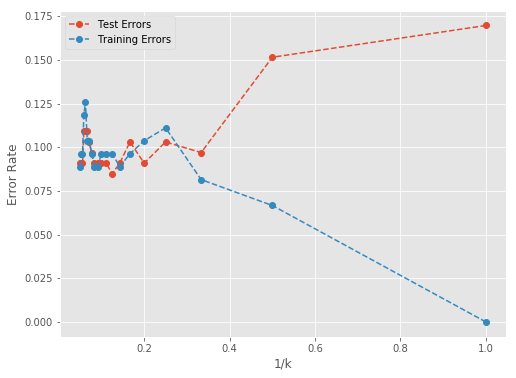

In [138]:
# Get Training/Test Predictors and Responses #
##############################################
predictors = ['horsepower', 'weight', 'acceleration']
X_train =  df_train[predictors].values
y_train = df_train['MPG01'].values

X_test = df_test[predictors].values
y_test = df_test['MPG01'].values

# make arrays to hold training/test error rates for each of the  k-values between 1 and 20
train_error_rate = np.zeros(20)
test_error_rate = np.zeros(20)
k_values = np.arange(1,21)

# Build 20 KNN classifiers varying k between 1 and 20 and evaluate the model's performance
for idx, k in enumerate(k_values):
    # Construct a KNN classifier and fit
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,y_train)
    
    # use the model on the training data to get training error rate
    y_train_predicted = knn.predict(X_train)
    
    # compute the training error rate for this k-value
    train_error_rate[idx] = np.mean(y_train_predicted!=y_train)
    
    # Use the model on the held out test data
    y_test_predicted = knn.predict(X_test)
    
    # compute the error rate for this k-value
    test_error_rate[idx] = np.mean(y_test_predicted!=y_test)

print('Test Error Rates=', test_error_rate)
    
# Plot Train and Test Error Rate
fig, ax = plt.subplots(figsize=(8,6))
inverse_k = 1/k_values
ax.plot(inverse_k, test_error_rate, linestyle='--', marker='o', label='Test Errors');
ax.plot(inverse_k, train_error_rate,linestyle='--', marker='o', label='Training Errors')
ax.set_xlabel('1/k')
ax.set_ylabel('Error Rate')
plt.legend(loc='best');

The lowest testing errror rate occurs for k=5 and is ~ 10% error rate. The logistic model also performed at about this level.

<img src="../images/4.12.jpg">

### Question 12)

In [143]:
def power(x, power):
    """ prints out x**power """
    x_power = x**power
    print(x_power)
    
    return x_power
    
power(131, 3)

2248091


2248091

In [145]:
def power3(x,a):
    """ returns x raised to float a """
    return(x**a)

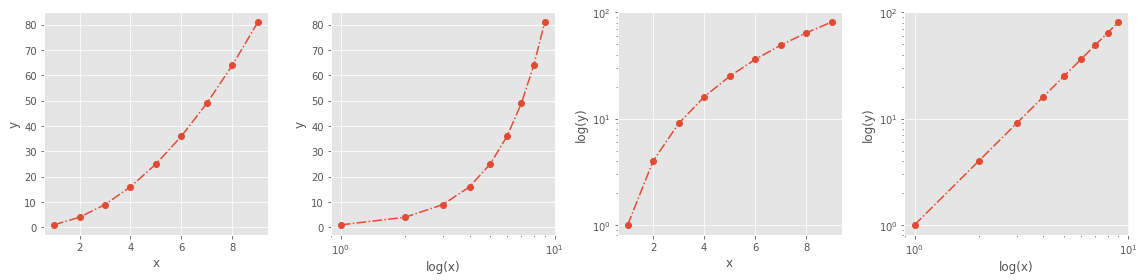

In [146]:
# call power3 with exponent=2 on an array
x = np.arange(1,10)
y = power3(x,2)

fig, (ax1,ax2,ax3,ax4) = plt.subplots(1,4, figsize=(16,4))

# Plot x vs y
ax1.plot(x,y,linestyle='-.', marker='o')
ax1.set_xlabel('x')
ax1.set_ylabel('y')

# Plot log(x) vs y
ax2.semilogx(x,y, linestyle='-.', marker='o')
ax2.set_xlabel('log(x)')
ax2.set_ylabel('y')

# Plot x vs log(y)
ax3.semilogy(x,y, linestyle='-.', marker='o')
ax3.set_xlabel('x')
ax3.set_ylabel('log(y)')

# Plot log log
ax4.loglog(x,y, linestyle='-.', marker='o')
ax4.set_xlabel('log(x)')
ax4.set_ylabel('log(y)')

plt.tight_layout()

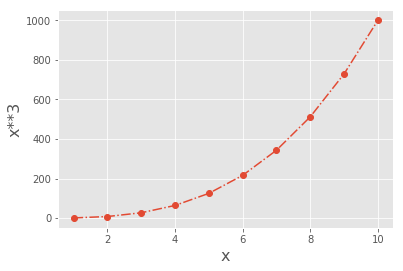

In [147]:
def plot_power(x,a):
    """Plots x vs x**a """
    # generate dependent
    y = x**a
    
    # create plot
    fig, ax = plt.subplots(figsize=(6,4))
    ax.plot(x,y, linestyle = '-.', marker = 'o')
    ax.set_xlabel('x',fontsize=16)
    ax.set_ylabel('x**'+str(a),fontsize=16)

plot_power(np.arange(1,11),3)

<img src="../images/4.13.jpg">

### Question 13)

- [Load Boston Dataset](#Load-Boston-Dataset)
- [Explore Predictor Response Relationship](#Explore-Predictor-Response-Relationship)
- [Split Data into Train/Test Sets](#Split-Data-into-Test\Train-Sets)
- [Logistic Regression of Suburb Crime Rate](#Logistic-Regression-of-Crime-Rate)
- [LDA Classification of Suburb Crime Rate](#LDA-Classification-of-Suburb-Crime-Rate)
- [KNN Classification of Suburb Crime Rate](#KNN-Classification-of-Suburb-Crime-Rate)

In [148]:
## perform imports and set-up
from sklearn.datasets import load_boston
from sklearn.preprocessing import scale

## Load Boston Dataset

In [149]:
# Load Boston housing data set
boston = load_boston()

# remind ourselves of what the variables are.
print(boston['DESCR'])

#Transform the data into a dataframe for analysis¶

# combine the predictors and responses for a dataframe
predictors = boston.data
response = boston.target
boston_data = np.column_stack([predictors,response])

# now get the column names of the data frame
col_names = np.append(boston.feature_names, 'MEDV')

# create the data frame
df = pd.DataFrame(boston_data, columns = col_names)
df.head()

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


We now need to create a new column in the dataframe CRIM01. For each suburb, dataframe (row), if the CRIM of that suburb > Median(CRIM) CRIM01=True and otherwise False. It is a logical array representing whether each suburb is above or below the median crime rate of all the suburbs.

In [155]:
# add a column to the datafram where suburbs with CRIM > median(CRIM) is 1 and otherwise 0
med = df.CRIM.median()
df['CRIM01'] = np.array([1 if val > med else 0 for val in df["CRIM"].values])
df.head(3)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,CRIM01
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0,0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6,0
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7,0


## Explore Predictor-Response Relationship

In order to perform our modeling of the CRIM01 Response, we need to first examine which predictors may influence the Response. Scatter-plots and Box-plots are incredibly useful for looking at how the data is distributed among classes. Lets start with some scatterplots.

### Correlations

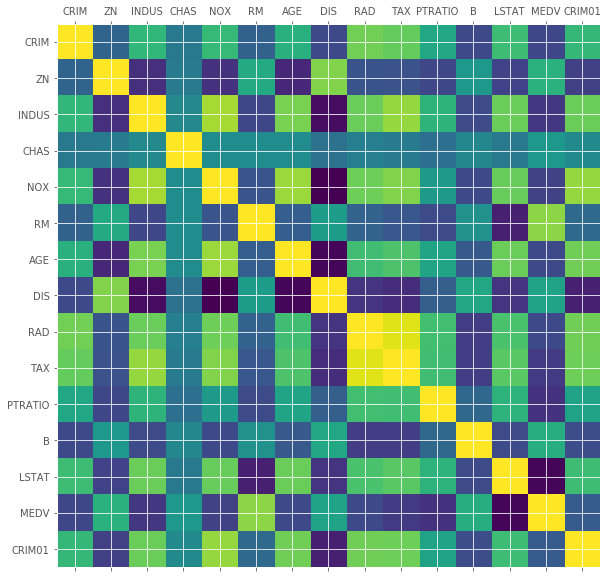

In [157]:
corr = plot_corr(df)

In [158]:
corr

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,CRIM01
CRIM,1,-0.199458,0.404471,-0.0552953,0.417521,-0.21994,0.350784,-0.377904,0.622029,0.579564,0.28825,-0.377365,0.45222,-0.385832,0.407321
ZN,-0.199458,1,-0.533828,-0.0426967,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.17552,-0.412995,0.360445,-0.436151
INDUS,0.404471,-0.533828,1,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.72076,0.383248,-0.356977,0.6038,-0.483725,0.60326
CHAS,-0.0552953,-0.0426967,0.062938,1,0.0912028,0.0912512,0.0865178,-0.0991758,-0.00736824,-0.0355865,-0.121515,0.0487885,-0.0539293,0.17526,0.0700968
NOX,0.417521,-0.516604,0.763651,0.0912028,1,-0.302188,0.73147,-0.76923,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321,0.723235
RM,-0.21994,0.311991,-0.391676,0.0912512,-0.302188,1,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.69536,-0.156372
AGE,0.350784,-0.569537,0.644779,0.0865178,0.73147,-0.240265,1,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955,0.61394
DIS,-0.377904,0.664408,-0.708027,-0.0991758,-0.76923,0.205246,-0.747881,1,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929,-0.616342
RAD,0.622029,-0.311948,0.595129,-0.00736824,0.611441,-0.209847,0.456022,-0.494588,1,0.910228,0.464741,-0.444413,0.488676,-0.381626,0.619786
TAX,0.579564,-0.314563,0.72076,-0.0355865,0.668023,-0.292048,0.506456,-0.534432,0.910228,1,0.460853,-0.441808,0.543993,-0.468536,0.608741


### Scatter Plots

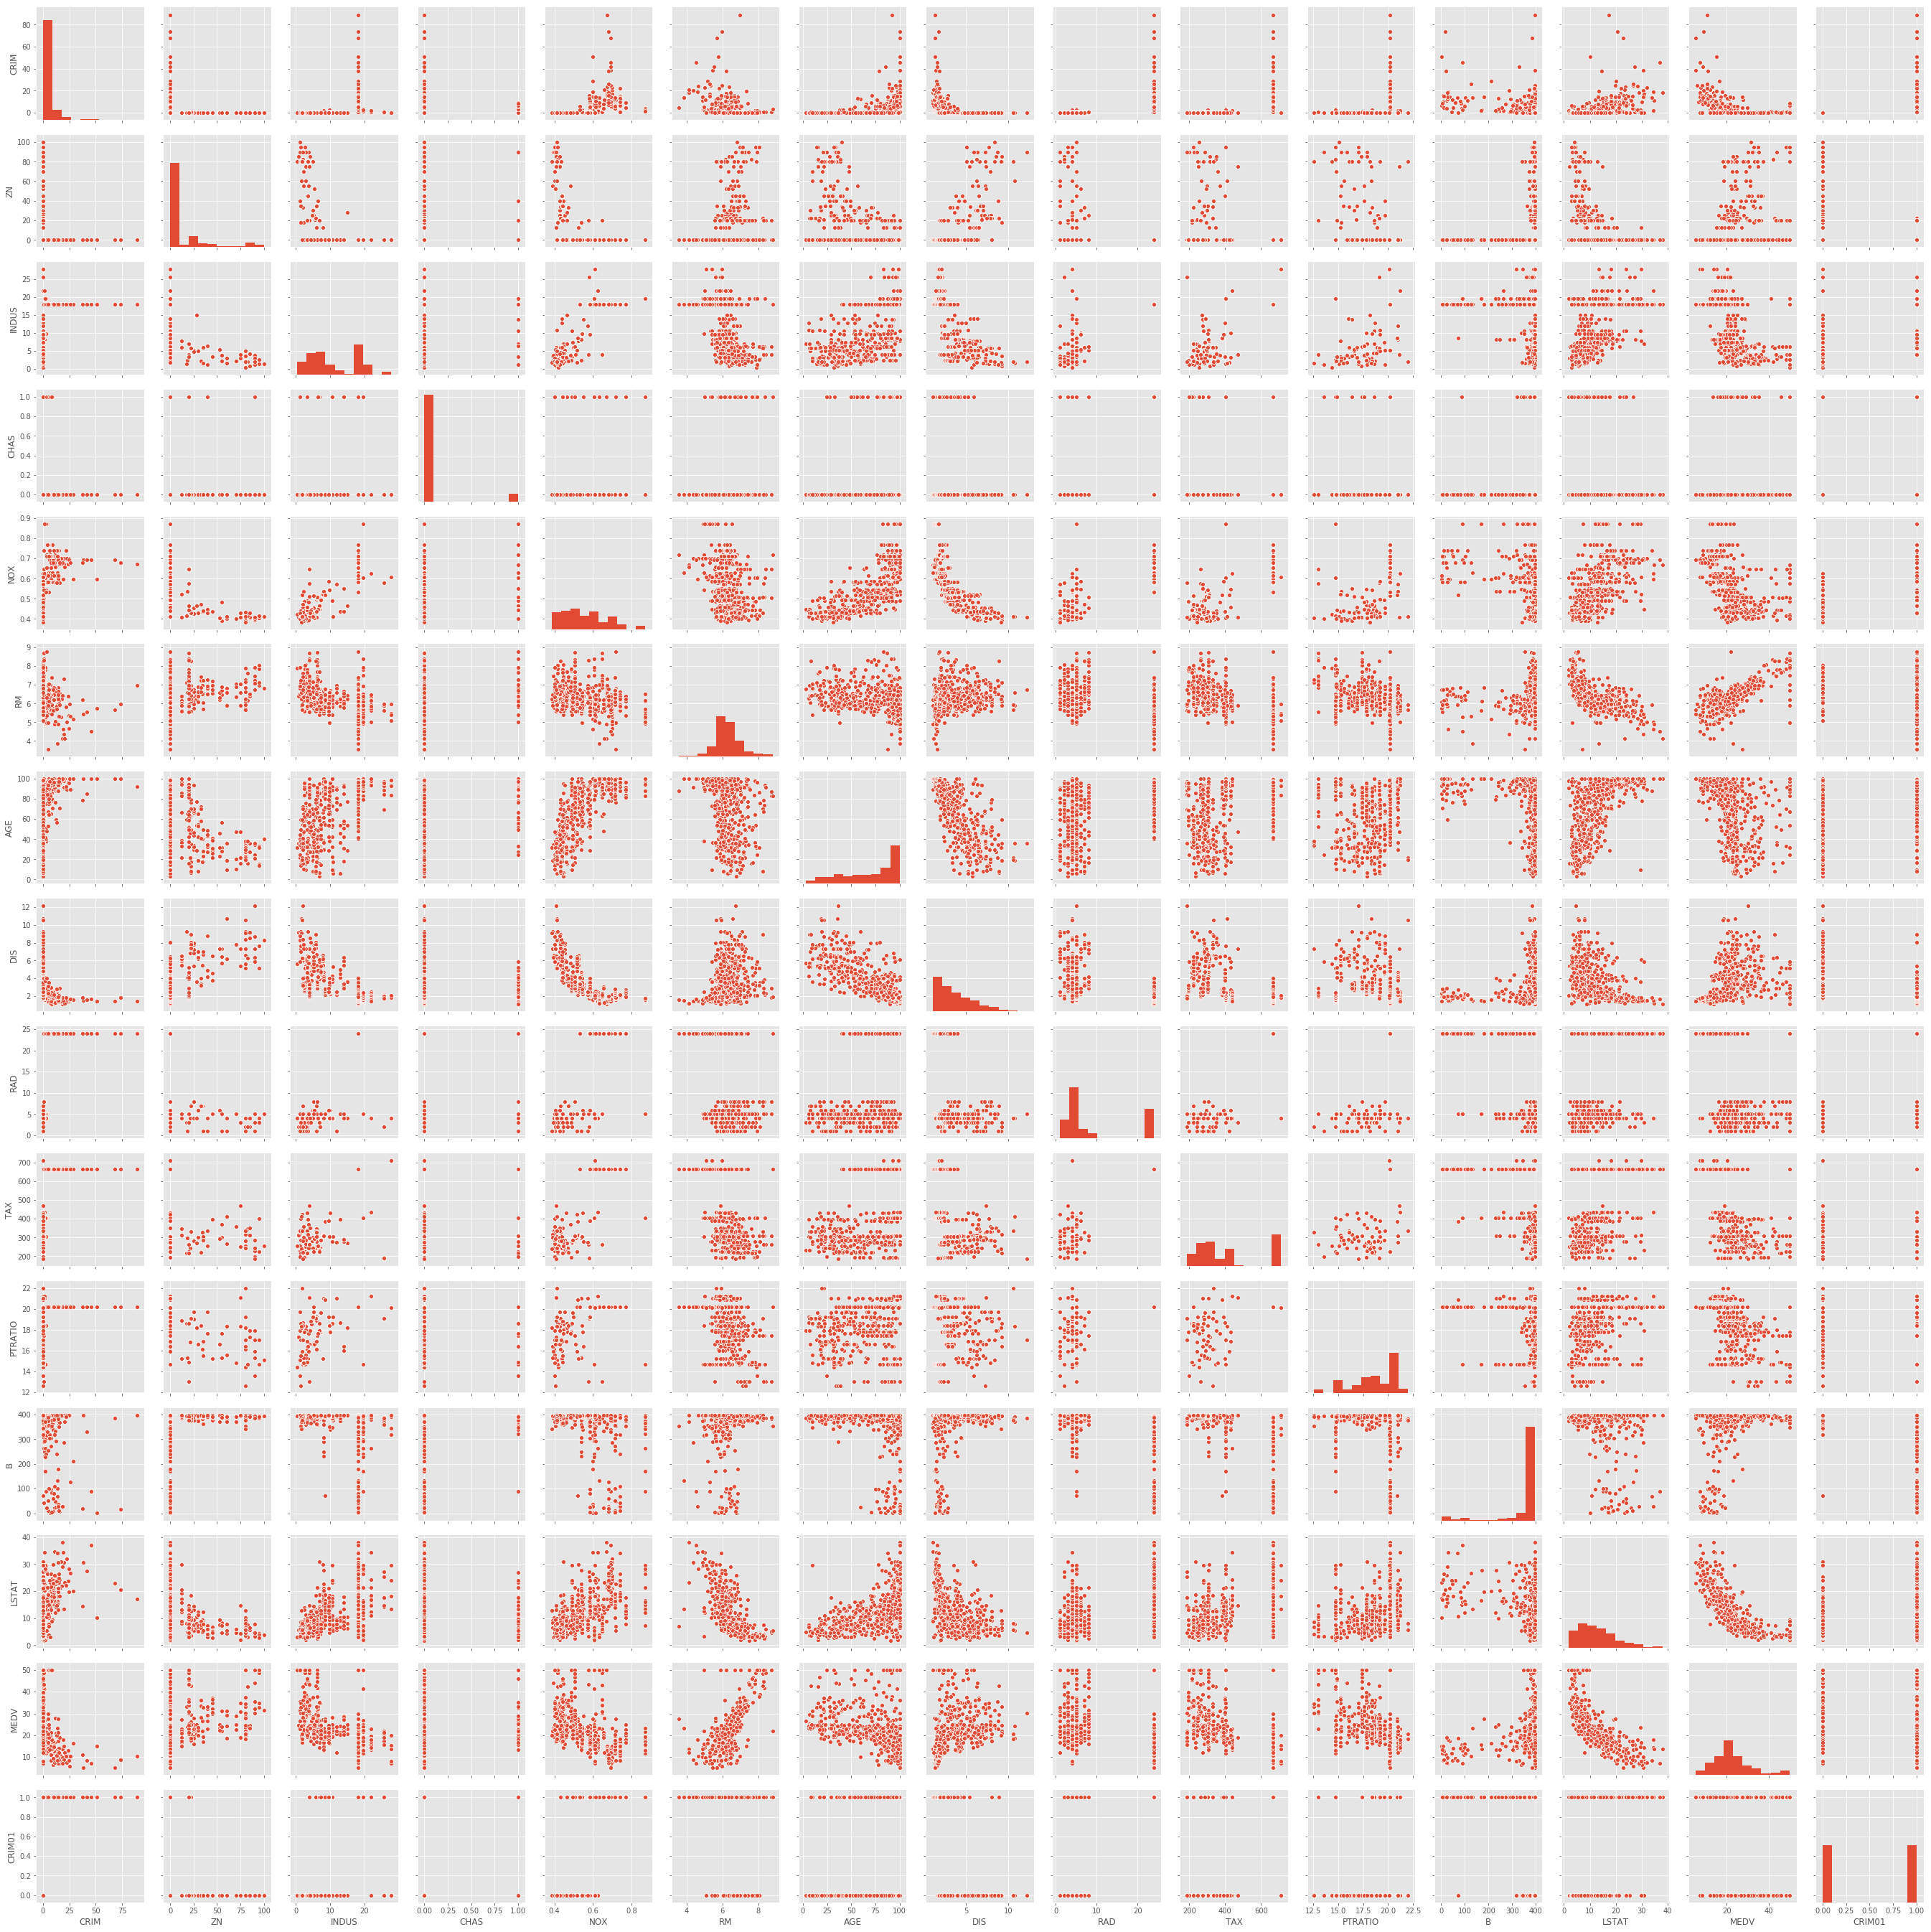

In [159]:
sns.pairplot(df, diag_kind="hist")

plt.show()

Candidates for predictors appear to be NOX, RM, AGE, PTRATIO, LSTAT, MEDV. We can take a look at some box plots to get an idea of whether these predictors are different for each class of CRIM01.

### Boxplots

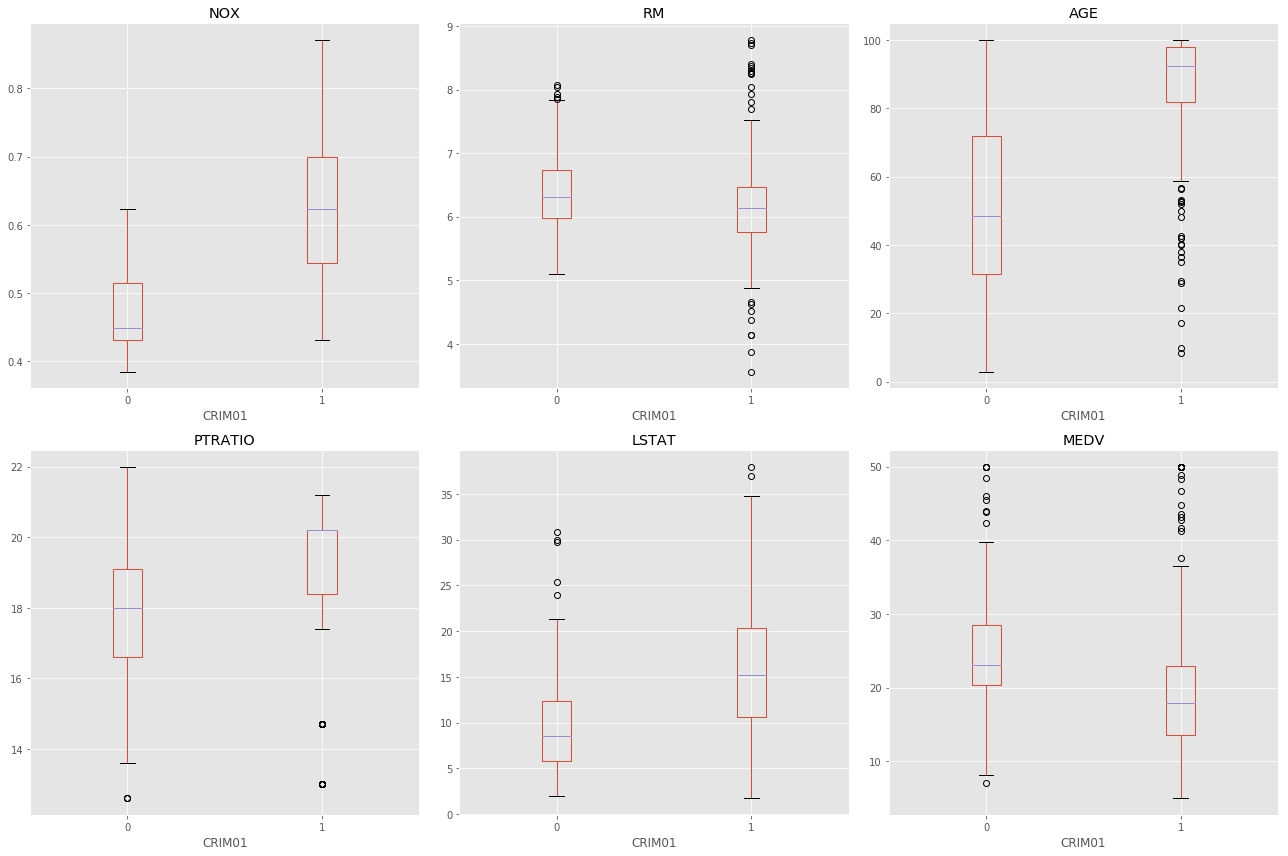

In [160]:
# Construct box plots grouped by MPG01
fig, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(2,3, figsize=(18,12))
df.boxplot(['NOX'], by='CRIM01', ax=ax1);
df.boxplot(['RM'],by='CRIM01',ax=ax2);
df.boxplot(['AGE'], by='CRIM01', ax=ax3);
df.boxplot(['PTRATIO'], by='CRIM01', ax=ax4);
df.boxplot(['LSTAT'],by='CRIM01',ax=ax5);
df.boxplot(['MEDV'], by='CRIM01', ax=ax6);

plt.tight_layout()
fig.suptitle(''); # remove pandas auto title

From these plots we can see that NOX, AGE, PTRATIO, LSTAT, and MEDV will be useful in predicting CRIM01 class membership because for each predictor, the medians of the two classes are very different.

## Split Data into Test/Train Sets

In [161]:
# select 400 random samples from dataframe for training
rows = np.random.choice([True, False], 400)
df_train = df.loc[rows]
df_test = df.loc[~rows]

## Logistic Regression of Suburb Crime Rate

In [162]:
# Get Training/Test Predictors and Responses #
##############################################
predictors = ['NOX', 'AGE', 'PTRATIO', 'LSTAT', 'MEDV']
X_train = sm.add_constant(df_train[predictors])
X_test = sm.add_constant(df_test[predictors])

y_train = df_train.CRIM01.values
y_test = df_test.CRIM01.values

#Create Model, Fit and Evaluate #
##################################
logit = sm.Logit(y_train, X_train)
results = logit.fit()
print('\n', results.summary()) 
# use the fit to estimate the predicted probability and convert to boolean
y_predicted = results.predict(X_test) > 0.5
print('\n **The error rate of the LOGISTIC model is {0:.2f}%** '.format(100*np.mean(y_predicted!=y_test)))

Optimization terminated successfully.
         Current function value: 0.267126
         Iterations 9

                            Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                  217
Model:                          Logit   Df Residuals:                      211
Method:                           MLE   Df Model:                            5
Date:                Sun, 09 Dec 2018   Pseudo R-squ.:                  0.6033
Time:                        16:39:08   Log-Likelihood:                -57.966
converged:                       True   LL-Null:                       -146.12
                                        LLR p-value:                 3.274e-36
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        -33.5394      6.093     -5.505      0.000     -45.481     -21.598
NOX           43.1076      

Interestingly, the AGE and LSTAT did not have statistically significant coeffecients. This may be due to correlations between the predictors. Let's take a look...

In [163]:
print('\n Correlations = \n' , df_train[predictors].corr())


 Correlations = 
               NOX       AGE   PTRATIO     LSTAT      MEDV
NOX      1.000000  0.708923 -0.014784  0.538964 -0.222151
AGE      0.708923  1.000000  0.138344  0.573605 -0.220295
PTRATIO -0.014784  0.138344  1.000000  0.240732 -0.418542
LSTAT    0.538964  0.573605  0.240732  1.000000 -0.677700
MEDV    -0.222151 -0.220295 -0.418542 -0.677700  1.000000


Yes, AGE is correlated with NOX, and LSTAT. LSTAT is correlated with NOX, AGE and MEDV. This explains why these predictors are not significant. So the set of predictors to use in our models will be NOX, PTRATIO and MEDV.

## LDA Classification of Suburb Crime Rate

In [164]:
# Get Predictors and Responses #
################################
# from the logistic regression we determined NOX, PTRATIO and MEDV to be the indpt predictors associated with CRIM01
predictors = ['NOX', 'PTRATIO', 'MEDV']

# create a training/Testing design matrix
X_train = df_train[predictors].values
X_test = df_test[predictors].values

# get the train/test responses
y_train = df_train.CRIM01.values
y_test = df_test.CRIM01.values

# Build LDA Classifier and Fit #
################################
lda_clf = LDA(solver='lsqr',store_covariance=True)
lda_clf.fit(X_train,y_train)

print('Class Priors =', lda_clf.priors_)
print('Class Means =', lda_clf.means_[0], lda_clf.means_[1])
print('Coeffecients =', lda_clf.coef_)

# Predict Test Data and Evaluate #
##################################
y_predicted = lda_clf.predict(X_test)
print('\n **The error rate of the LDA model is {0:.2f}%** '.format(100*np.mean(y_predicted!=y_test)))

Class Priors = [0.5991 0.4009]
Class Means = [ 0.466  17.8869 25.1423] [ 0.6259 18.3977 24.2851]
Coeffecients = [[30.5682  0.4358  0.0992]]

 **The error rate of the LDA model is 18.58%** 


## KNN Classification of Suburb Crime Rate

Test Error Rates= [0.2842 0.2842 0.3169 0.306  0.3224 0.2842 0.2951 0.2951 0.2951 0.2896
 0.3005 0.2896 0.2896 0.2896 0.2842 0.2896 0.2896 0.2951 0.2951 0.3005]


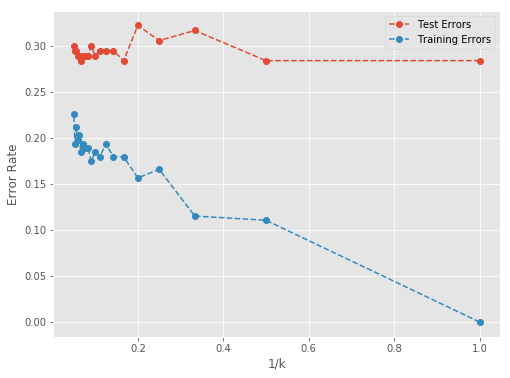

In [165]:
# make arrays to hold training/test error rates for each of the  k-values between 1 and 20
train_error_rate = np.zeros(20)
test_error_rate = np.zeros(20)
k_values = np.arange(1,21)

# Build 20 KNN classifiers varying k between 1 and 20 and evaluate the model's performance
for idx, k in enumerate(k_values):
    # Construct a KNN classifier and fit
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,y_train)
    
    # use the model on the training data to get training error rate
    y_train_predicted = knn.predict(X_train)
    # compute the training error rate for this k-value
    train_error_rate[idx] = np.mean(y_train_predicted!=y_train)
    
    # Use the model on the held out test data
    y_test_predicted = knn.predict(X_test)
    # compute the error rate for this k-value
    test_error_rate[idx] = np.mean(y_test_predicted!=y_test)

print('Test Error Rates=', test_error_rate)
    
# Plot Train and Test Error Rate
fig, ax = plt.subplots(figsize=(8,6))
inverse_k = 1/k_values
ax.plot(inverse_k, test_error_rate, linestyle='--', marker='o', label='Test Errors');
ax.plot(inverse_k, train_error_rate,linestyle='--', marker='o', label='Training Errors')
ax.set_xlabel('1/k')
ax.set_ylabel('Error Rate')
plt.legend(loc='best');

So comparing these models, we find that the logistic model is outperforming both the LDA and KNN models. There are a few scenarios that may account for why this is so. 1) The predictor observations may not be drawn from a normal distribution thus violating the assumptions of the LDA model. 2) The KNN model may not be performing well because the training set is small (400 observations) so it may have a low bias on the training data (error rate for k=3 is ~11%) but the model pays a price in high variance.